In [11]:
import nltk
nltk.download('treebank')
len(treebank.tagged_sents())

[nltk_data] Downloading package treebank to
[nltk_data]     /home/santiago/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


3914

In [73]:
from nltk.tag.hmm import HiddenMarkovModelTrainer
from nltk.tag.perceptron import PerceptronTagger
from nltk.tag import tnt
from nltk.tag import CRFTagger
from nltk.corpus import treebank

#train_data = treebank.tagged_sents()[:30]
#test_data = treebank.tagged_sents()[3000:]

test_data = treebank.tagged_sents()[3001:]

hmmTrainer = HiddenMarkovModelTrainer()
PER = PerceptronTagger(load=False)
TnT = tnt.TnT()
CRF = CRFTagger()

train_sizes = [500, 1000, 1500, 2000, 2500, 3000]
trainers = [TnT, PER, CRF]
results = []

for size in train_sizes:
    print('Using training size: ', size)
    result = []
    train_data = treebank.tagged_sents()[:size]
    HMM = hmmTrainer.train_supervised(train_data)
    result.append(round(HMM.evaluate(test_data), 3))
    for trainer in trainers:
        if trainer == CRF:
            trainer.train(train_data, 'crf_tagger_model')
        else:
            trainer.train(train_data)
            
        result.append(round(trainer.evaluate(test_data), 3))
    results.append(result)

results



Using training size:  500
Using training size:  1000
Using training size:  1500


KeyboardInterrupt: 

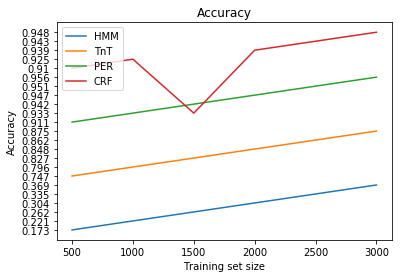

In [72]:
import matplotlib
import matplotlib.pyplot as plt


plt.title('Accuracy')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
for i in range(len(results[0])):
    plt.plot(train_sizes, [col[i] for col in results])
#plt.plot(train_sizes, [col[0] for col in results])
plt.legend(['HMM', 'TnT', 'PER', 'CRF'], loc='upper left')
plt.show()

In [ ]:
import dill 

# saving
with open("tnt_treebank_pos_tagger", "wb") as f:
    dill.dump(TnT, f)

# loading
with open("tnt_treebank_pos_tagger", "rb") as f:
    TnT = dill.load(f)